**DATA VISUALIZATION HOMEWORK 3**

**NAME:** Letizia

**SURNAME:** Lanza 

**ID:** VR502321

**EXERCISE 1:**

Consider the karate club graph in the networkx distribution used in Lab4 G = nx.karate_club_graph().

Try to implement the Baryentric heuristic to sort nodes in the arc diagram and use nxviz to display the arc diagram sorted according to the heuristic and with node colored according to the node degree.

**REMEMBER:** the algorithm is not guaranteed to converge, so use a limited number of iterations

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from nxviz import ArcPlot
import matplotlib.colors as mcolors

/Users/letizialanza/miniconda3/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
#create the Karate Club graph from the networkx library
G = nx.karate_club_graph() 

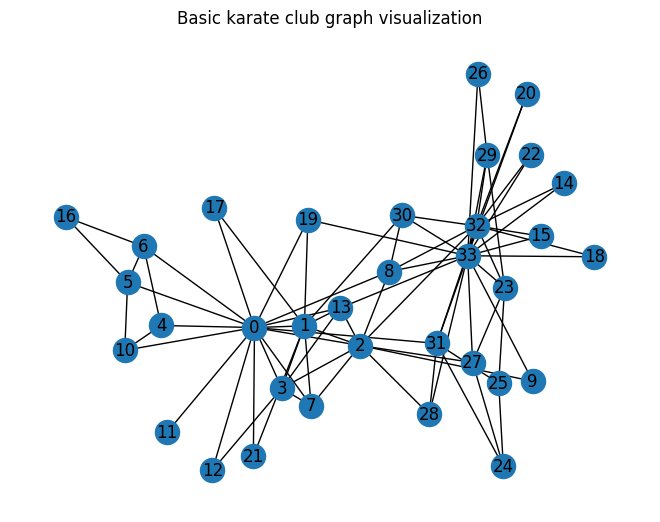

In [3]:
#visualize the basic graph
nx.draw(G, with_labels = True)
plt.title('Basic karate club graph visualization')
plt.show()

/Users/letizialanza/miniconda3/lib/python3.11/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

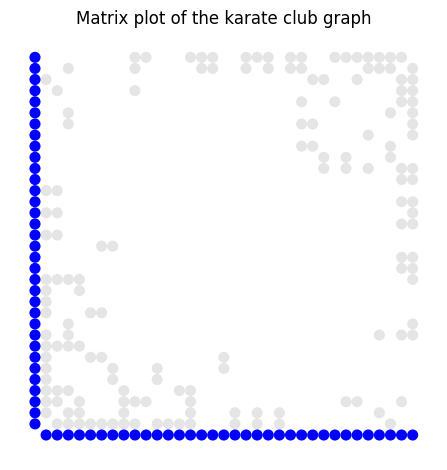

In [4]:
#visualize the graph using MatrixPlot (basic visualization for adjacency)
plt.figure(figsize = (8, 6))
m = nv.MatrixPlot(G)
plt.title('Matrix plot of the karate club graph')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

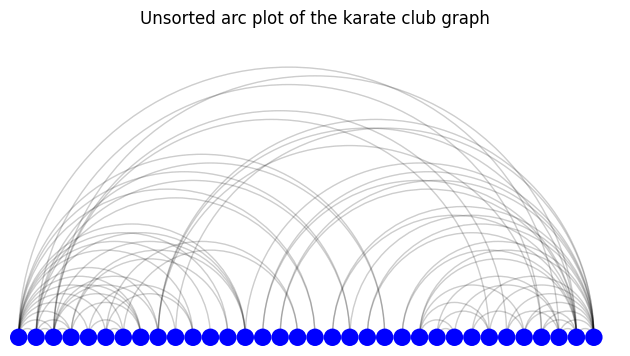

In [5]:
#visualize the graph using ArcPlot (initial unsorted version)
plt.figure(figsize = (8, 6))
a = nv.ArcPlot(G)
plt.title('Unsorted arc plot of the karate club graph')  
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

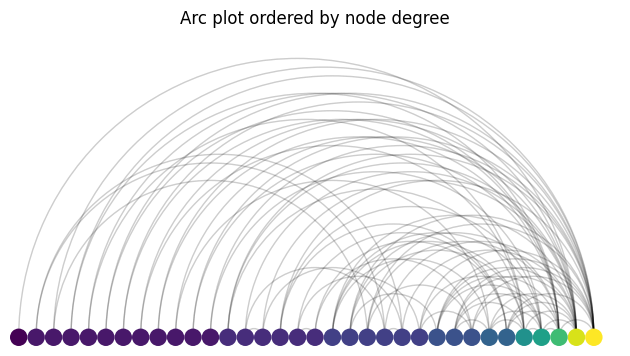

In [6]:
#assign the degree of each node as a node attribute for later use in visualization
for n, d in G.nodes(data = True):
    G.nodes[n]['degree'] = nx.degree(G, n)

#create an arc plot where nodes are ordered and colored by their degree
#this provides an intermediate visualization before applying the barycentric sorting
plt.figure(figsize = (8, 6))
a = nv.ArcPlot(G, node_order = 'degree', node_color = 'degree')
plt.title('Arc plot ordered by node degree') 
plt.tight_layout()
plt.show()

In [7]:
#define the Barycentric sorting heuristic
def barycentric_sorting(G, max_iterations = 100):

#sort nodes in a graph using the Barycentric heuristic
#the goal is to minimize edge crossings in the arc diagram by positioning nodes based on the barycenter of their neighbors' positions
#parameters --> G: NetworkX graph and max_iterations: Maximum number of iterations to perform (default: 100)
#returns --> sorted_nodes: List of nodes sorted by their barycentric positions


#initialize positions: each node starts at its initial index
    positions = {n: i for i, n in enumerate(G.nodes())}

    #perform iterative updates to refine positions
    for _ in range(max_iterations):
        new_positions = {}
        for node in G.nodes():
            #get the neighbors of the current node
            neighbors = list(G.neighbors(node))

            #if the node has no neighbors, keep its position unchanged
            if not neighbors:
                new_positions[node] = positions[node]
            else:
                #calculate the barycenter (average position) of the neighbors
                barycenter = np.mean([positions[neighbor] for neighbor in neighbors])
                new_positions[node] = barycenter

        #sort nodes based on their new barycentric positions
        sorted_nodes = sorted(new_positions, key = new_positions.get)

        #update positions for the next iteration
        positions = {n: i for i, n in enumerate(sorted_nodes)}

    return sorted_nodes

In [8]:
#apply the Barycentric heuristic to sort the nodes
sorted_nodes = barycentric_sorting(G)
sorted_nodes

[16,
 5,
 6,
 4,
 10,
 11,
 0,
 12,
 17,
 21,
 3,
 7,
 1,
 19,
 13,
 2,
 8,
 30,
 9,
 14,
 15,
 18,
 20,
 22,
 28,
 31,
 27,
 23,
 26,
 29,
 24,
 33,
 32,
 25]

<Figure size 1000x600 with 0 Axes>

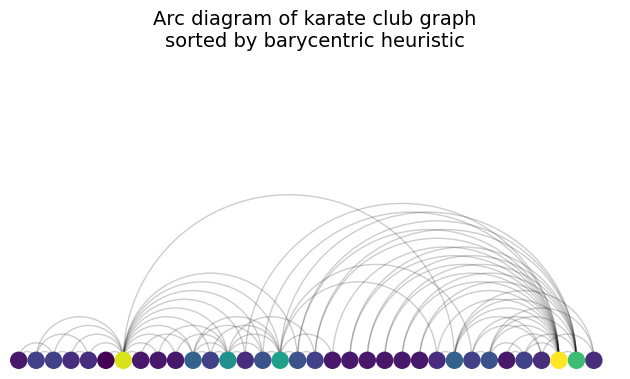

In [9]:
#assign the sorted order as a node attribute for visualization purposes
for i, node in enumerate(sorted_nodes):
    G.nodes[node]['sorted_order'] = i

#create the arc plot with nodes sorted by the barycentric heuristic
#node color is determined by their degree
plt.figure(figsize=(10, 6))
a = nv.ArcPlot(
    G,
    node_order = 'sorted_order',  #use the sorted order for arranging nodes
    node_color = 'degree',        #color nodes by their degree
)

plt.title('Arc diagram of karate club graph\nsorted by barycentric heuristic', fontsize = 14)
plt.tight_layout()
plt.show()

**EXERCISE 2:**

Load the Spotify 30K songs dataset used in HW1. Consider the following tasks (and related target data):

- Using Plotly, create a treemap, representing the hierarchy of the playlist_genres and subgenres, with box sizes mapped from the number of items, and color mapped from the average popularity. Use a non - default, perceptually uniform sequential colormap and set the color range mapped to the whole range of potential values of the average popularity (0 - 100). Visualize the same hierarchy tree as a node - link diagram with node size proportional to the number of items, the color proportional to the average popularity
- Create a simple Dash app with the possibility of selecting the songs of different decades (1950 - 1960, 1961 - 1970, ...) with a menu and the type of chart (treemap or sunburst) with another menu. The apps should show with the selected chart type the tree representation of the hierarchy: all --> genres --> subgenres

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import networkx as nx

In [11]:
#load and preprocess the dataset
songs = pd.read_csv('spotify_songs.csv')
rows = songs.shape[0] 
cols = songs.shape[1]
print('Rows   : ' + str(rows)) 
print('Columns: ' + str(cols))

#remove NaN values
songs = songs.dropna()

#add 'release_year' and 'duration' columns
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)
songs['duration'] = songs['duration_ms'] / 1000
songs.sort_values(by = 'year', ascending = True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [12]:
#group by genre and subgenre to get the count and average popularity
genre_subgenre = songs.groupby(['playlist_genre', 'playlist_subgenre']).agg(
    count = ('track_id', 'size'),
    avg_popularity = ('track_popularity', 'mean')
).reset_index()

genre_subgenre

,playlist_genre,playlist_subgenre,count,avg_popularity
0,edm,big room,1206,32.282753
1,edm,electro house,1511,35.510258
2,edm,pop edm,1517,45.686223
3,edm,progressive electro house,1809,26.867883
4,latin,latin hip hop,1655,43.477341
5,latin,latin pop,1262,51.099842
6,latin,reggaeton,948,52.925105
7,latin,tropical,1288,43.327640
8,pop,dance pop,1298,52.079353
9,pop,electropop,1408,42.725142


In [13]:
#create the treemap
fig_treemap = px.treemap(
    genre_subgenre,
    path = [px.Constant('all'), 'playlist_genre', 'playlist_subgenre'],
    values = 'count',
    color = 'avg_popularity',
    color_continuous_scale = 'Cividis',
    range_color = [0, 100],
    color_continuous_midpoint=np.average(genre_subgenre['avg_popularity']),
    title = 'Treemap of playlist genres and subgenres'
)
fig_treemap.update_layout(
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    coloraxis_colorbar = dict(title = 'Average Popularity') 
)

fig_treemap.show()

In [14]:
genre_subgenre

,playlist_genre,playlist_subgenre,count,avg_popularity
0,edm,big room,1206,32.282753
1,edm,electro house,1511,35.510258
2,edm,pop edm,1517,45.686223
3,edm,progressive electro house,1809,26.867883
4,latin,latin hip hop,1655,43.477341
5,latin,latin pop,1262,51.099842
6,latin,reggaeton,948,52.925105
7,latin,tropical,1288,43.327640
8,pop,dance pop,1298,52.079353
9,pop,electropop,1408,42.725142


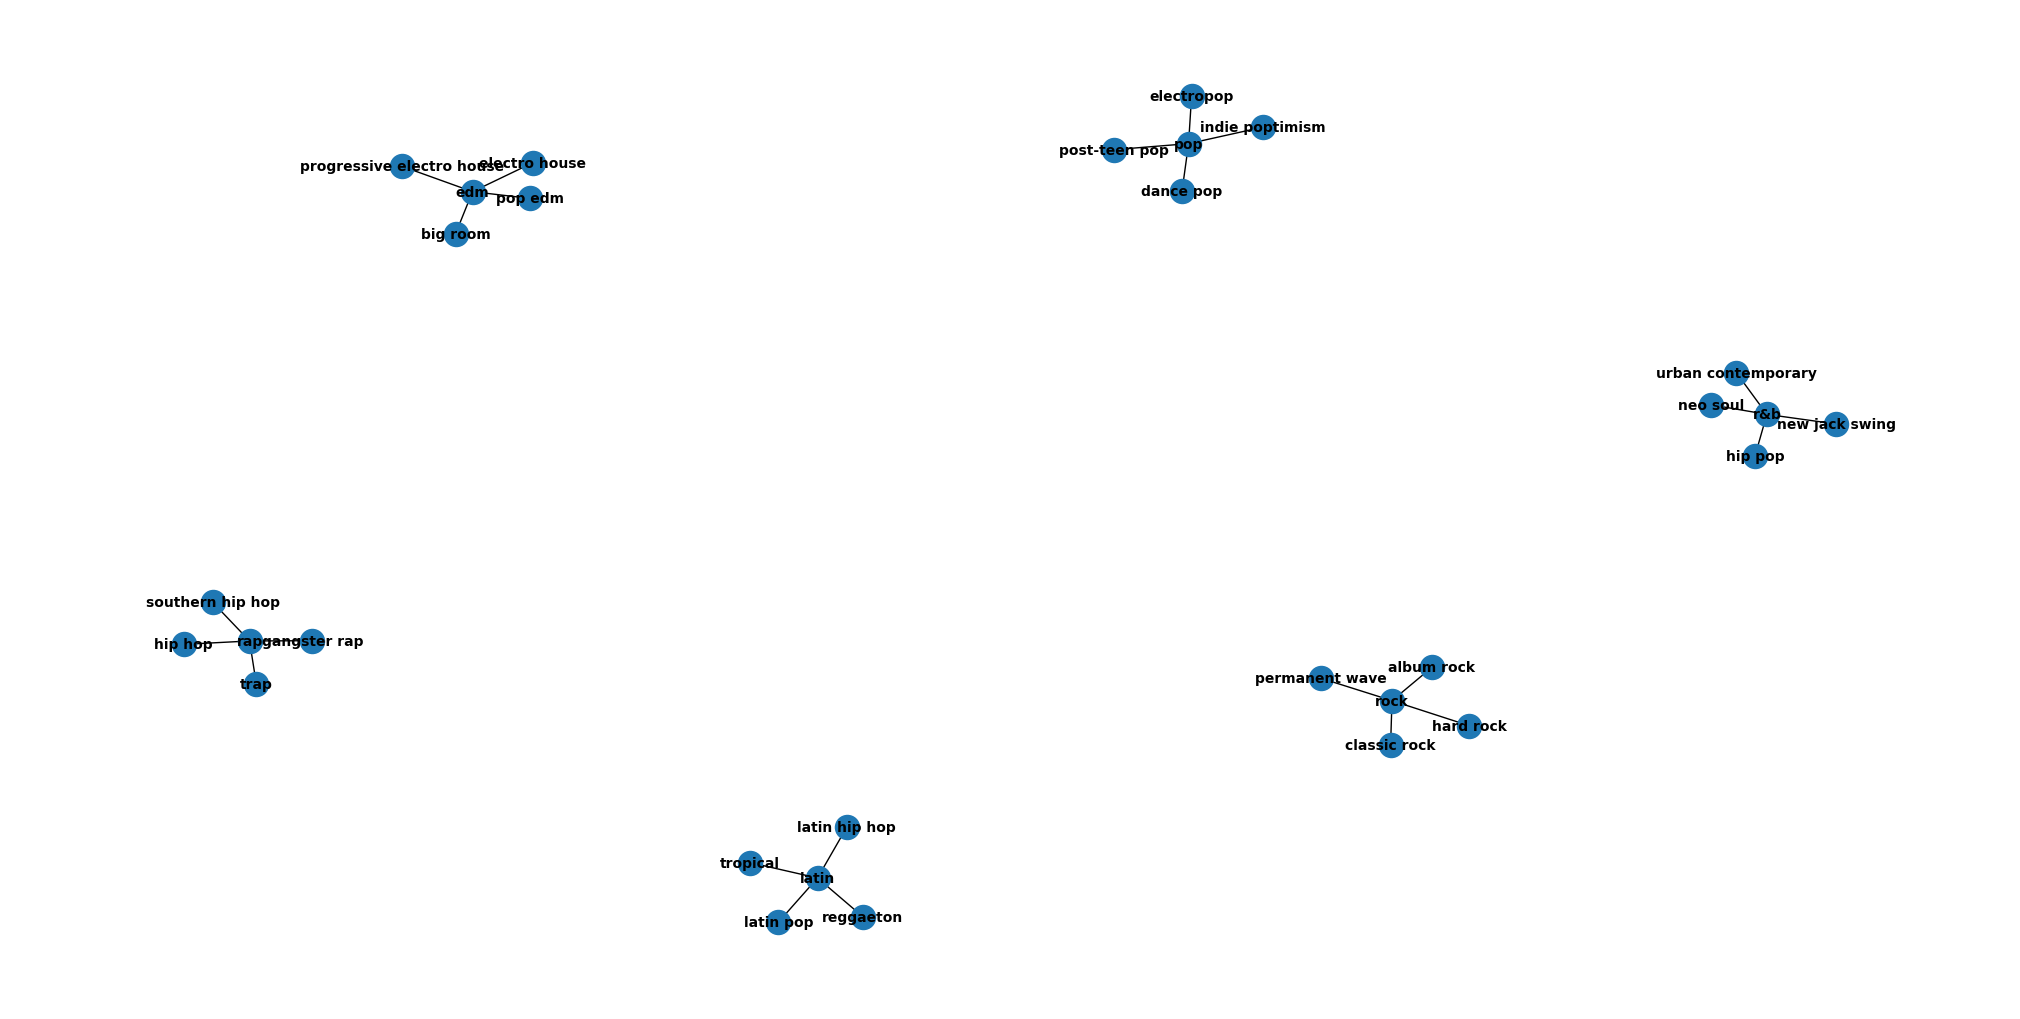

In [15]:
#create a new graph from df
H = nx.from_pandas_edgelist(genre_subgenre, 'playlist_genre', 'playlist_subgenre', ["count", "avg_popularity"])

#plot the graph
plt.figure(figsize = (20, 10))
nx.draw(H, with_labels = True, font_size = 10, font_weight = 'bold')

In [16]:
H.edges(data = True)

EdgeDataView([('edm', 'big room', {'count': 1206, 'avg_popularity': 32.282752902155885}), ('edm', 'electro house', {'count': 1511, 'avg_popularity': 35.510258107213765}), ('edm', 'pop edm', {'count': 1517, 'avg_popularity': 45.68622280817403}), ('edm', 'progressive electro house', {'count': 1809, 'avg_popularity': 26.867882808181317}), ('latin', 'latin hip hop', {'count': 1655, 'avg_popularity': 43.477341389728096}), ('latin', 'latin pop', {'count': 1262, 'avg_popularity': 51.09984152139461}), ('latin', 'reggaeton', {'count': 948, 'avg_popularity': 52.925105485232066}), ('latin', 'tropical', {'count': 1288, 'avg_popularity': 43.327639751552795}), ('pop', 'dance pop', {'count': 1298, 'avg_popularity': 52.079352850539294}), ('pop', 'electropop', {'count': 1408, 'avg_popularity': 42.72514204545455}), ('pop', 'indie poptimism', {'count': 1672, 'avg_popularity': 42.475478468899524}), ('pop', 'post-teen pop', {'count': 1129, 'avg_popularity': 56.82550930026572}), ('r&b', 'hip pop', {'count':

In [17]:
#get positions for the nodes in H
pos_ = nx.spring_layout(H)
pos_

{'edm': array([0.33293072, 0.69493333]),
 'big room': array([0.40025528, 0.63672294]),
 'electro house': array([0.40559637, 0.77575722]),
 'pop edm': array([0.30346023, 0.79257417]),
 'progressive electro house': array([0.26771736, 0.59842394]),
 'latin': array([-0.35777878, -0.73663206]),
 'latin hip hop': array([-0.31522657, -0.8241096 ]),
 'latin pop': array([-0.45283389, -0.72392   ]),
 'reggaeton': array([-0.29166487, -0.64128605]),
 'tropical': array([-0.42131227, -0.82781126]),
 'pop': array([-0.9051502 ,  0.15852545]),
 'dance pop': array([-0.99572105,  0.2240332 ]),
 'electropop': array([-0.92864363,  0.06060061]),
 'indie poptimism': array([-0.96954394,  0.13153522]),
 'post-teen pop': array([-0.79843869,  0.17211972]),
 'r&b': array([ 0.45734539, -0.91413277]),
 'hip pop': array([ 0.41434369, -0.97351878]),
 'neo soul': array([ 0.54287712, -0.98495053]),
 'new jack swing': array([ 0.48812423, -0.82534486]),
 'urban contemporary': array([ 0.36452586, -0.94772322]),
 'rap': ar

In [18]:
H.edges()[('edm', 'electro house')]

{'count': 1511, 'avg_popularity': 35.510258107213765}

In [19]:
#assign positions to each node in graph H using the pos_ dictionary
for n, p in pos_.items():
    H.nodes[n]['pos'] = p

In [20]:
H.nodes(data = True)

NodeDataView({'edm': {'pos': array([0.33293072, 0.69493333])}, 'big room': {'pos': array([0.40025528, 0.63672294])}, 'electro house': {'pos': array([0.40559637, 0.77575722])}, 'pop edm': {'pos': array([0.30346023, 0.79257417])}, 'progressive electro house': {'pos': array([0.26771736, 0.59842394])}, 'latin': {'pos': array([-0.35777878, -0.73663206])}, 'latin hip hop': {'pos': array([-0.31522657, -0.8241096 ])}, 'latin pop': {'pos': array([-0.45283389, -0.72392   ])}, 'reggaeton': {'pos': array([-0.29166487, -0.64128605])}, 'tropical': {'pos': array([-0.42131227, -0.82781126])}, 'pop': {'pos': array([-0.9051502 ,  0.15852545])}, 'dance pop': {'pos': array([-0.99572105,  0.2240332 ])}, 'electropop': {'pos': array([-0.92864363,  0.06060061])}, 'indie poptimism': {'pos': array([-0.96954394,  0.13153522])}, 'post-teen pop': {'pos': array([-0.79843869,  0.17211972])}, 'r&b': {'pos': array([ 0.45734539, -0.91413277])}, 'hip pop': {'pos': array([ 0.41434369, -0.97351878])}, 'neo soul': {'pos': 

In [21]:
#initialize lists to store edge coordinates 
edge_x = []
edge_y = []
for edge in H.edges(): #loop through each edge in the graph H
    x0, y0 = H.nodes[edge[0]]['pos'] #get position of first node
    x1, y1 = H.nodes[edge[1]]['pos'] #get position of second node 
    edge_x.append(x0) #append coordinates to edge lists 
    edge_x.append(x1)
    edge_x.append(None) #none is used to create breaks between edges in the plot 
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter( #create edge trace for visualization
    x = edge_x, y = edge_y,
    line = dict(width = 0.5, color = '#888'),
    hoverinfo = 'none',
    mode = 'lines')

node_x = [] #initialize lists to store node coordinates 
node_y = []
for node in H.nodes(): #loop through each node in the graph H 
    x, y = H.nodes[node]['pos'] #get node position
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter( #create node trace for visualization 
    x = node_x, y = node_y,
    mode = 'markers',
    hoverinfo = 'text',
    marker = dict(
        colorscale = 'YlGnBu',
        reversescale = True,
        color = [],
        size = 10,
        colorbar = dict(
            thickness = 15,
            title = 'Node Connections',
            xanchor = 'left',
            titleside = 'right'
        ),
        line_width = 2))

fig = go.Figure(data = [edge_trace, node_trace], #create figure layout 
layout = go.Layout(
title = 'Node-link diagram of genre and subgenre',
titlefont_size = 16,
showlegend = False,
hovermode = 'closest',
margin = dict(b = 20,l = 5,r = 5,t = 40),
annotations = [ dict(
    text = '',
    showarrow = False,
    xref = 'paper', yref = 'paper',
    x = 0.005, y = -0.002 ) ],
xaxis = dict(showgrid = False, zeroline = False, showticklabels = False),
yaxis = dict(showgrid = False, zeroline = False, showticklabels = False))
)

fig.show()

In [22]:
import pandas as pd
import plotly.express as px
import numpy as np
from dash import Dash, html
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

In [23]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [24]:
decade_genre_subgenre = songs.copy()

#create the 'decade' column based on the 'year' column
decade_genre_subgenre['decade'] = pd.cut(decade_genre_subgenre['year'], bins = range(1950, 2031, 10), right = False, labels = [f"{i}-{i+9}" for i in range(1950, 2030, 10)])

decade_genre_subgenre

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration,decade
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,194.754,2010-2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,162.600,2010-2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,176.616,2010-2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,169.093,2010-2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,189.052,2010-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,204.375,2010-2019
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,353.120,2010-2019
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,210.112,2010-2019
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,367.432,2010-2019


In [25]:
#create the DataFrame with aggregated data (count and average popularity)
df = decade_genre_subgenre.groupby(['decade','playlist_genre', 'playlist_subgenre']).agg(
    count = ('track_id', 'size'), #count the number of songs in each group
    avg_popularity = ('track_popularity', 'mean') #calculate the average popularity of songs
).reset_index()

#filter out rows with count = 0 (if there are any subgenres with no songs)
df = df[df['count'] > 0]
df

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1588/4145167316.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,decade,playlist_genre,playlist_subgenre,count,avg_popularity
95,1950-1959,r&b,urban contemporary,1,59.000000
122,1950-1959,rock,classic rock,2,37.000000
179,1960-1969,latin,latin hip hop,1,26.000000
209,1960-1969,pop,post-teen pop,1,80.000000
229,1960-1969,r&b,neo soul,9,43.888889
...,...,...,...,...,...
1112,2020-2029,rap,hip hop,98,55.836735
1125,2020-2029,rap,trap,56,41.928571
1130,2020-2029,rock,classic rock,3,50.666667
1135,2020-2029,rock,hard rock,32,37.593750


In [26]:
#create the Sunburst plot
fig_sunburst = px.sunburst(
    df,
    path = ['playlist_genre', 'playlist_subgenre'], #define the hierarchy (All -> Genre -> Subgenre)
    values = 'count', #size of each segment based on the count of songs
    color = 'avg_popularity', #color segments based on average popularity
    color_continuous_scale = 'Viridis', #use a color scale that is more accessible (color-blind friendly)
    title = 'Sunburst of playlist genres and subgenres by decade' #set the title of the chart
)

#update the layout for better spacing and readability
fig_sunburst.update_layout(margin = dict(t = 50, l = 25, r = 25, b = 25))
fig_sunburst.show()

In [27]:
#initialize the Dash app
app = Dash(__name__)

#define the layout of the app (structure of the app interface)
app.layout = html.Div([
    html.H1('Spotify Songs Visualization'), #title of the app
    html.Label('Select Decade:'), #dropdown to select a decade
    dcc.Dropdown(
        id = 'decade-dropdown',
        options = [{'label': decade, 'value': decade} for decade in df['decade'].unique()],
        value = df['decade'].unique()[0] #default value is the first decade in the list
    ),
    html.Label('Select Chart Type:'), #dropdown to select the chart type (Treemap or Sunburst)
    dcc.Dropdown(
        id = 'chart-type-dropdown',
        options = [
            {'label': 'Treemap', 'value': 'treemap'},
            {'label': 'Sunburst', 'value': 'sunburst'}
        ],
        value = 'treemap' #default value is Treemap
    ),
    html.Div(id = 'chart-description'), #placeholder for a description of the selected chart
    dcc.Graph(id = 'chart') #graph component to display the selected chart
])

#define the callback to update the chart based on user input (decade and chart type)
@app.callback(
    [Output('chart', 'figure'), #output for the chart figure
     Output('chart-description', 'children')], #output for the chart description
    [Input('decade-dropdown', 'value'), #input for selected decade
     Input('chart-type-dropdown', 'value')] #input for selected chart type
)

def update_chart(selected_decade, selected_chart_type):
    filtered_df = df[df['decade'] == selected_decade]  #filter the data based on the selected decade
    
    description = f"Showing {selected_decade} data." #prepare a description text based on the selected decade
    
    color_scale = 'Viridis'  #set a color scale that is color-blind friendly

    if selected_chart_type == 'treemap':  #generate the selected chart (either Treemap or Sunburst)
        fig = px.treemap( #create the Treemap chart
            filtered_df,
            path = [px.Constant("all"), 'playlist_genre', 'playlist_subgenre'], #define the hierarchy
            values = 'count', #size of the segments
            color = 'avg_popularity', #color segments by average popularity
            color_continuous_scale = color_scale, #apply the color scale
            range_color = [0, 100], #define the range of the color scale
            color_continuous_midpoint = np.average(filtered_df['avg_popularity']), #set the midpoint for coloring
            title = f'Treemap of Playlist Genres and Subgenres ({selected_decade})' #chart title
        )
    else:
        fig = px.sunburst( #create the Sunburst chart
            filtered_df,
            path = ['playlist_genre', 'playlist_subgenre'], #define the hierarchy
            values = 'count', #size of the segments
            color = 'avg_popularity', #color segments by average popularity
            color_continuous_scale = 'Viridis', #apply the color scale
            title = f'Sunburst of Playlist Genres and Subgenres ({selected_decade})' #chart title
        )

    fig.update_layout(margin = dict(t = 50, l = 25, r = 25, b = 25)) #update the layout with margins for a cleaner view
    return fig, description

#run the app
if __name__ == '__main__':
    app.run_server(debug = True)